In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv")

In [37]:
df.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [34]:
df.isnull().sum()
new_df=df[["bill_length_mm","bill_depth_mm","bill_depth_mm","body_mass_g"]].fillna(0)
new_df["sex"]=df["sex"].fillna("nil")
new_df["year"]=df["year"]
new_df["island"]=df["island"]
new_df["species"]=df["species"]

In [35]:
new_df.isnull().sum()

bill_length_mm    0
bill_depth_mm     0
bill_depth_mm     0
body_mass_g       0
sex               0
year              0
island            0
species           0
dtype: int64

In [36]:
new_df.sample(10)

,bill_length_mm,bill_depth_mm,bill_depth_mm,body_mass_g,sex,year,island,species
273,50.4,15.7,15.7,5750.0,male,2009,Biscoe,Gentoo
160,43.3,13.4,13.4,4400.0,female,2007,Biscoe,Gentoo
216,45.8,14.2,14.2,4700.0,female,2008,Biscoe,Gentoo
117,37.3,20.5,20.5,3775.0,male,2009,Torgersen,Adelie
17,42.5,20.7,20.7,4500.0,male,2007,Torgersen,Adelie
296,42.4,17.3,17.3,3600.0,female,2007,Dream,Chinstrap
267,55.1,16.0,16.0,5850.0,male,2009,Biscoe,Gentoo
40,36.5,18.0,18.0,3150.0,female,2007,Dream,Adelie
32,39.5,17.8,17.8,3300.0,female,2007,Dream,Adelie
41,40.8,18.4,18.4,3900.0,male,2007,Dream,Adelie


In [12]:
new_df.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [13]:
new_df.nunique()

id                   344
species                3
island                 3
bill_length_mm       165
bill_depth_mm         81
flipper_length_mm     56
body_mass_g           95
sex                    3
year                   3
dtype: int64

In [16]:
new_df.value_counts()

id   species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex     year
0    Adelie     Torgersen  39.1            18.7           181.0              3750.0       male    2007    1
226  Gentoo     Biscoe     46.4            15.0           216.0              4700.0       female  2008    1
234  Gentoo     Biscoe     47.4            14.6           212.0              4725.0       female  2009    1
233  Gentoo     Biscoe     52.5            15.6           221.0              5450.0       male    2009    1
232  Gentoo     Biscoe     49.1            14.5           212.0              4625.0       female  2009    1
                                                                                                         ..
113  Adelie     Biscoe     42.2            19.5           197.0              4275.0       male    2009    1
112  Adelie     Biscoe     39.7            17.7           193.0              3200.0       female  2009    1
111  Adelie     Biscoe     45.6  

In [38]:
one_hot=OneHotEncoder(sparse_output=False)
one=one_hot.fit_transform(new_df[["species","island","sex"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())
one

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,sex_nil
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
339,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
340,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
341,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
342,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
concaty=pd.concat([new_df,one],axis=1)
concaty=concaty.drop(columns=["sex","island","species"])

In [44]:
concaty

,bill_length_mm,bill_depth_mm,bill_depth_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,sex_nil
0,39.1,18.7,18.7,3750.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.5,17.4,17.4,3800.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,40.3,18.0,18.0,3250.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,36.7,19.3,19.3,3450.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,19.8,4000.0,2009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
340,43.5,18.1,18.1,3400.0,2009,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
341,49.6,18.2,18.2,3775.0,2009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
342,50.8,19.0,19.0,4100.0,2009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


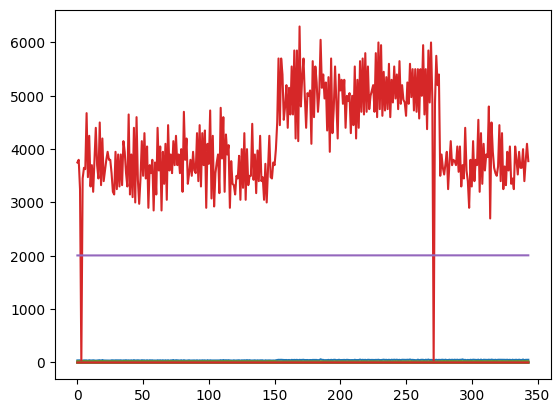

In [47]:
plt.plot(concaty)
plt.show()

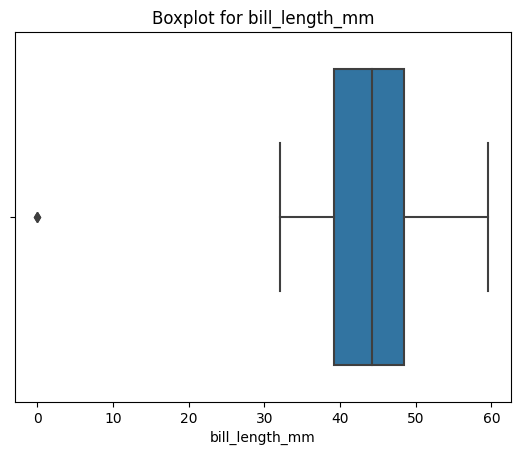

Skipping column 'bill_depth_mm': Non-numeric or empty.
Skipping column 'bill_depth_mm': Non-numeric or empty.


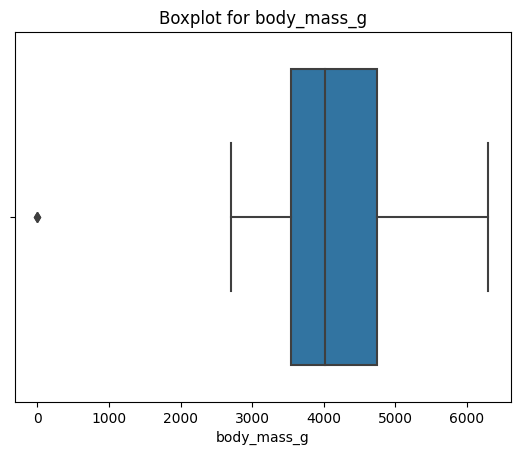

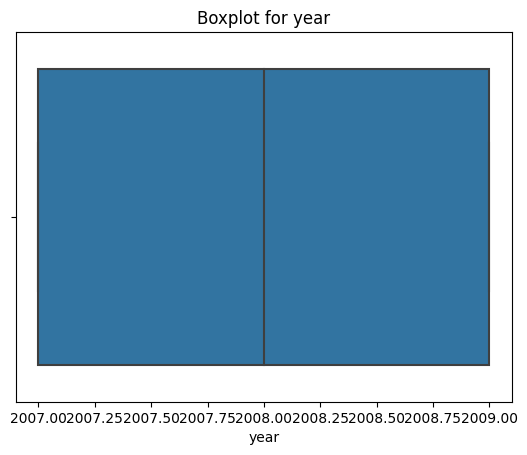

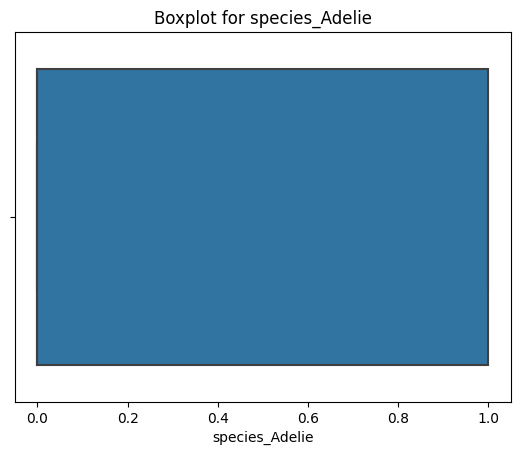

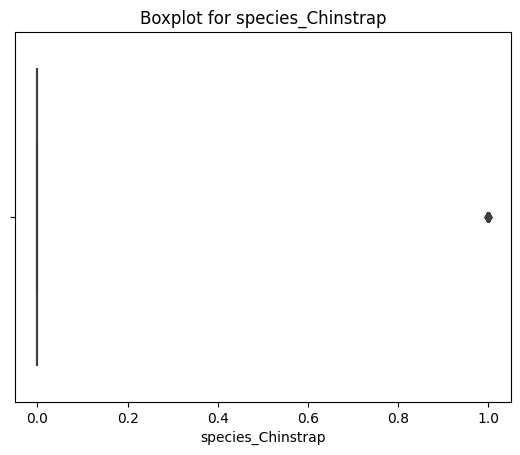

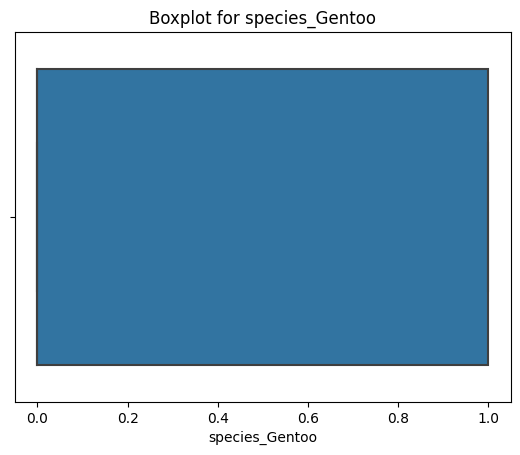

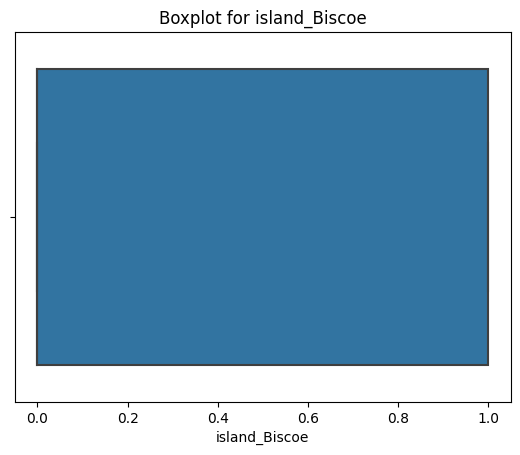

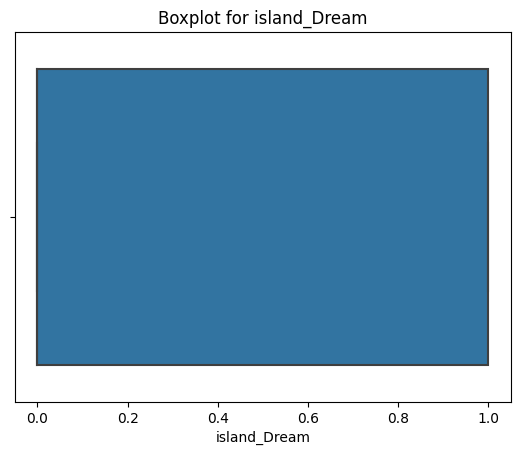

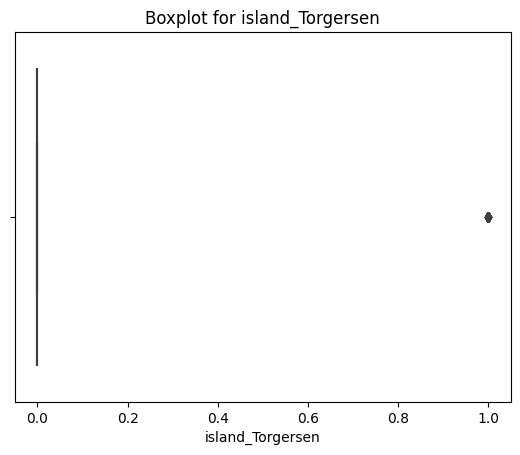

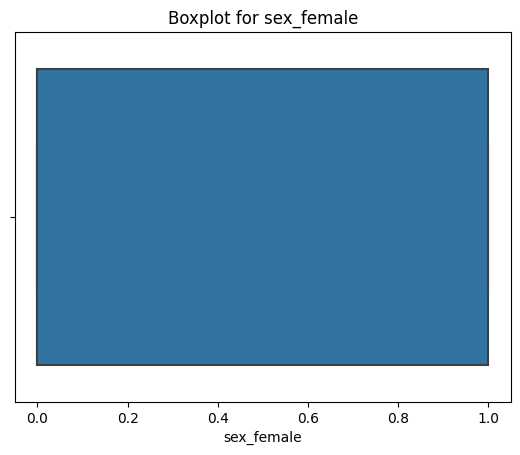

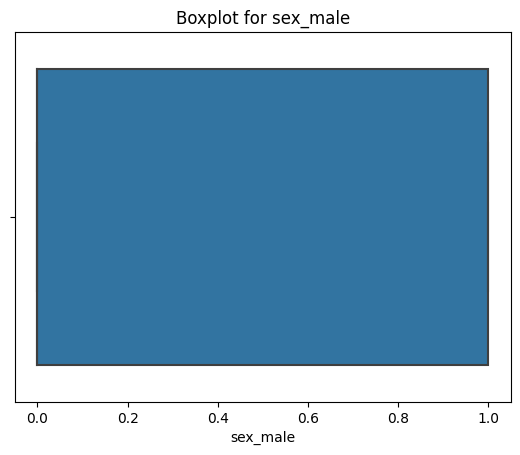

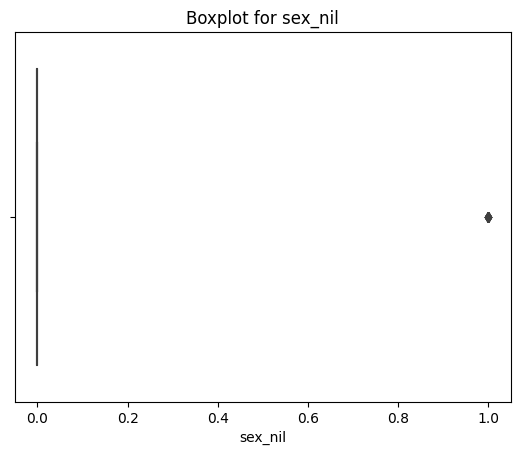

In [54]:
for col in concaty.columns:
  
    if pd.api.types.is_numeric_dtype(concaty[col]) and not concaty[col].dropna().empty:
        sns.boxplot(x=concaty[col].dropna())
        plt.title(f'Boxplot for {col}')
        plt.show()  
    else:
        print(f"Skipping column '{col}': Non-numeric or empty.")

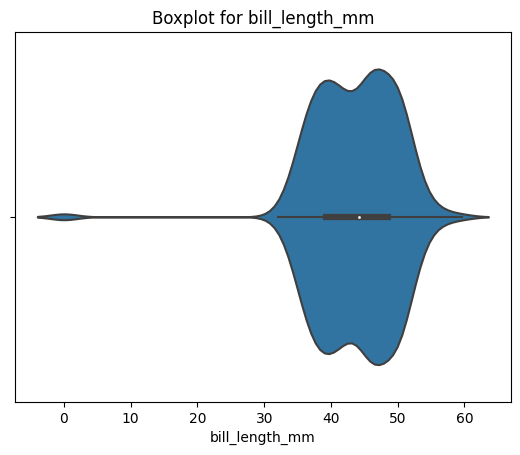

Skipping column 'bill_depth_mm': Non-numeric or empty.
Skipping column 'bill_depth_mm': Non-numeric or empty.


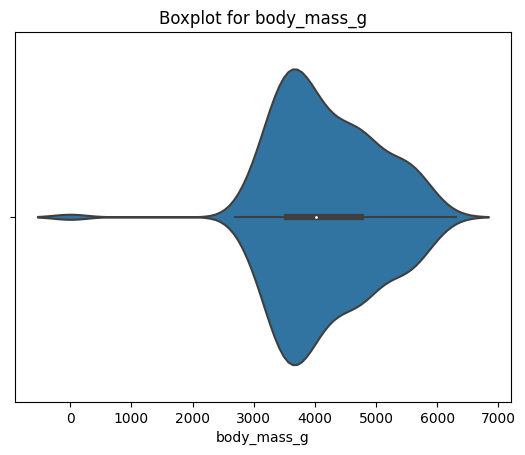

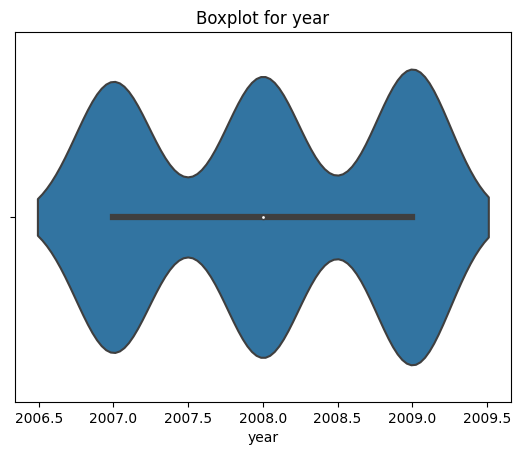

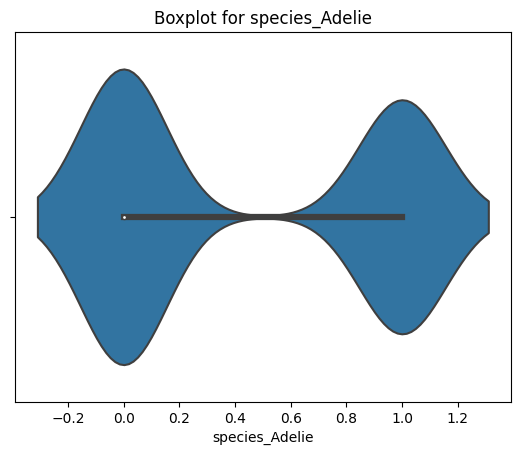

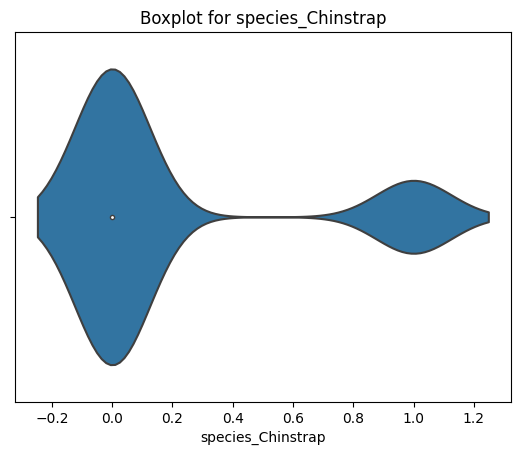

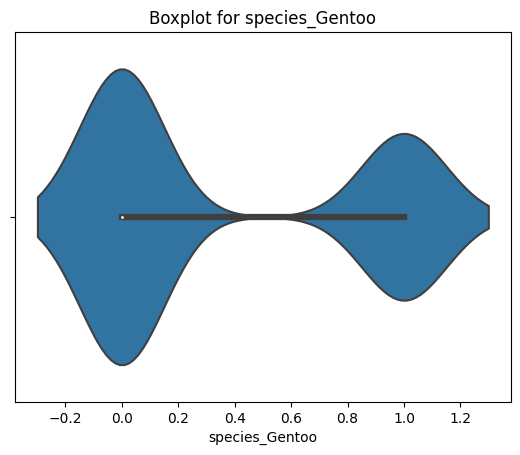

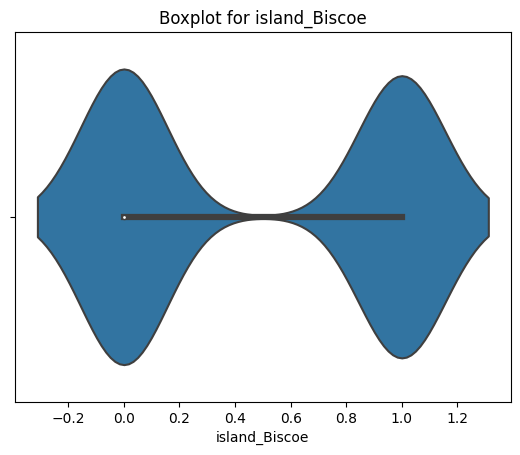

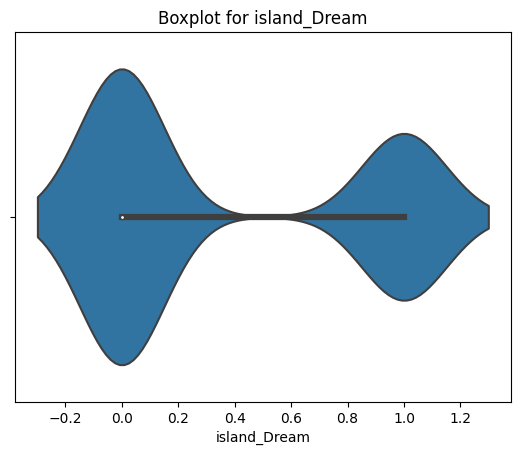

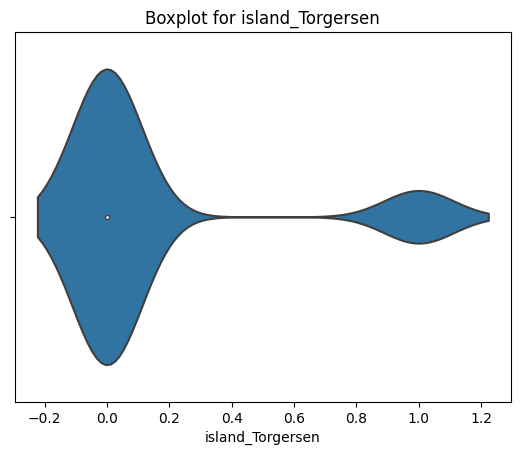

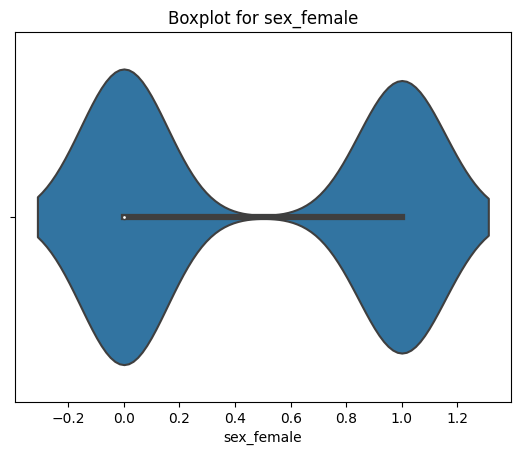

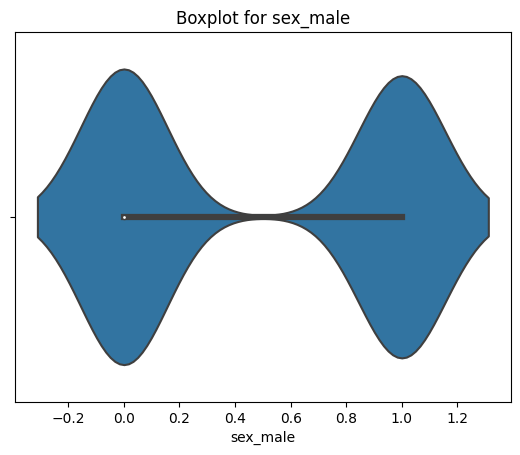

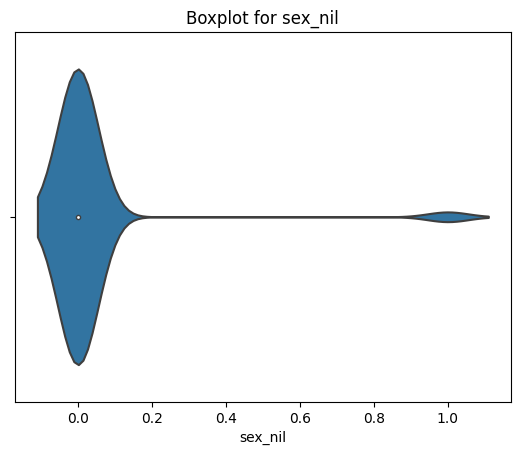

In [55]:
for col in concaty.columns:
  
    if pd.api.types.is_numeric_dtype(concaty[col]) and not concaty[col].dropna().empty:
        sns.violinplot(x=concaty[col].dropna())
        plt.title(f'Boxplot for {col}')
        plt.show()  
    else:
        print(f"Skipping column '{col}': Non-numeric or empty.")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


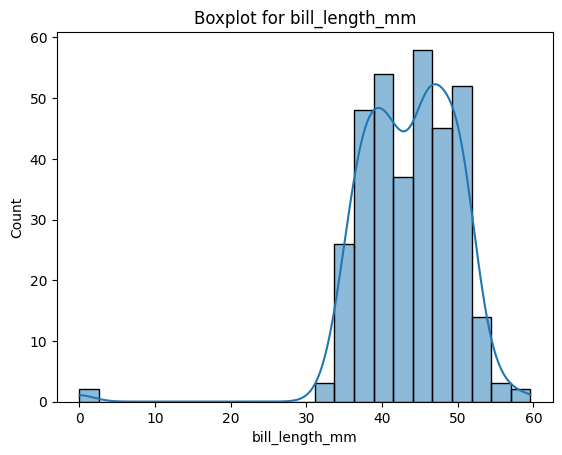

Skipping column 'bill_depth_mm': Non-numeric or empty.
Skipping column 'bill_depth_mm': Non-numeric or empty.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


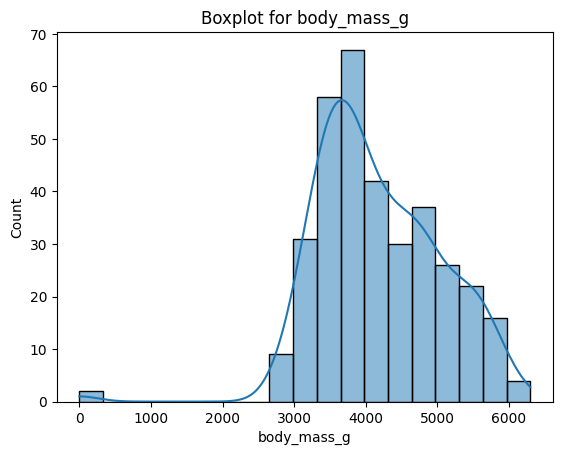

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


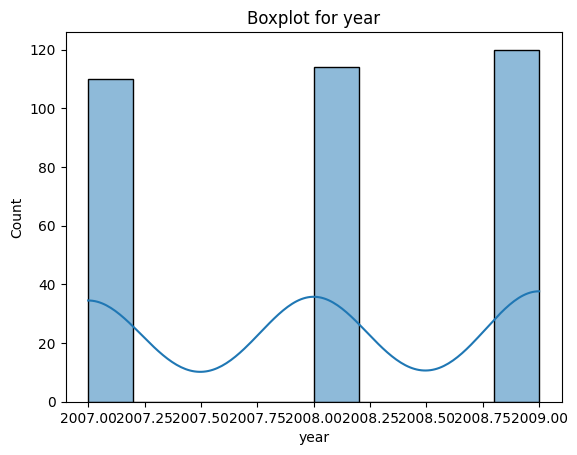

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


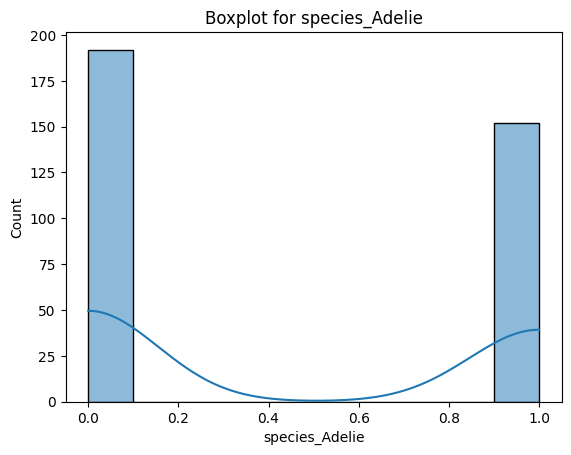

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


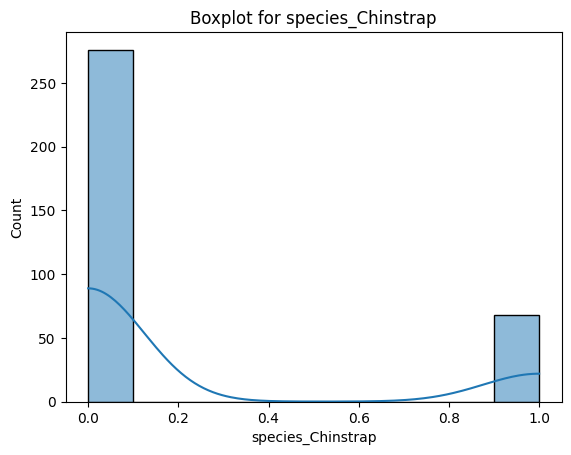

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


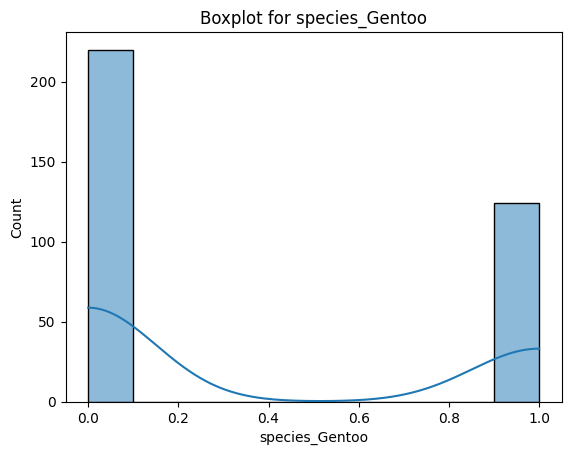

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


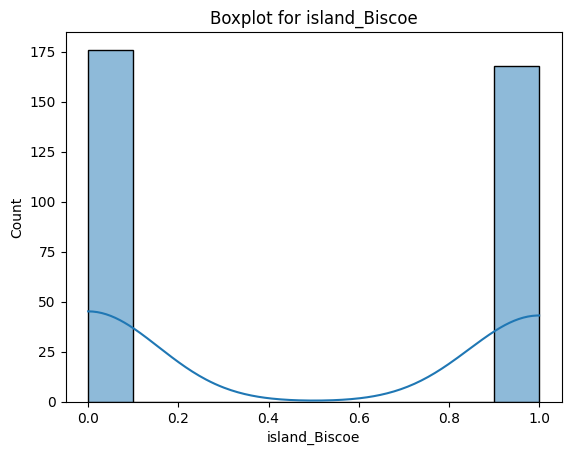

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


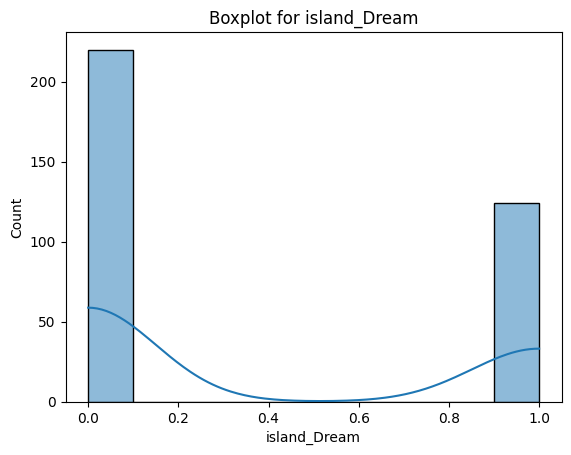

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


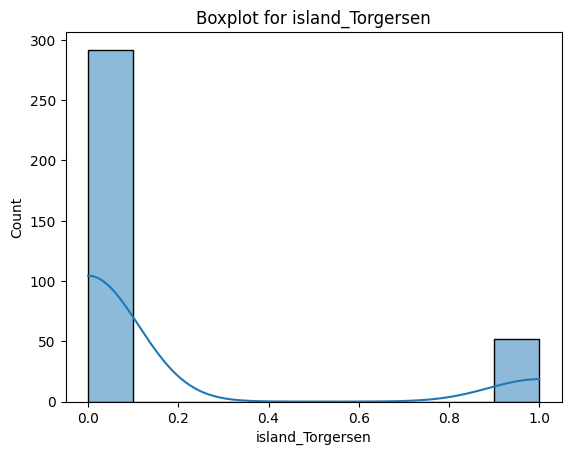

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


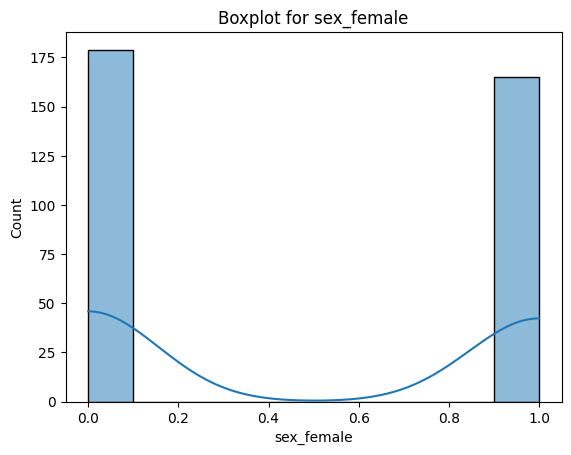

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


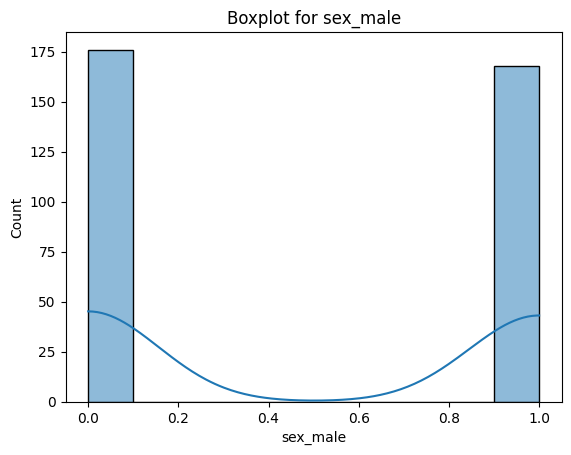

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


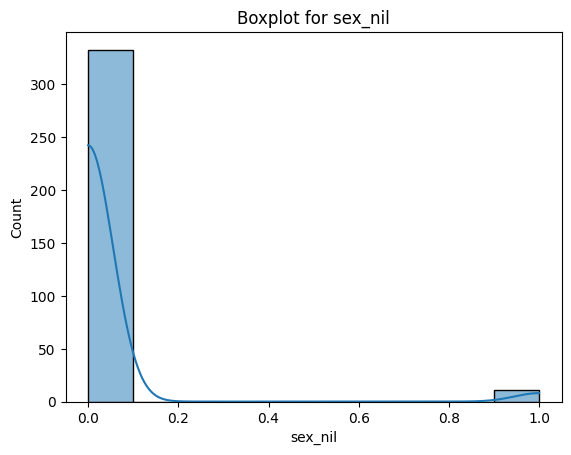

In [57]:
for col in concaty.columns:
  
    if pd.api.types.is_numeric_dtype(concaty[col]) and not concaty[col].dropna().empty:
        sns.histplot(x=concaty[col].dropna(),kde=True)
        plt.title(f'Boxplot for {col}')
        plt.show()  
    else:
        print(f"Skipping column '{col}': Non-numeric or empty.")